In [5]:
from sklearn import random_projection, cross_validation, datasets, grid_search, linear_model, metrics, manifold, preprocessing
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from collections import  Counter
import numpy as np
import pandas as pd
from sklearn.decomposition import RandomizedPCA
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.decomposition import TruncatedSVD, PCA
import xgboost as xgb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
dataframe = pd.read_csv('dataframe/genres_40.csv')
dataframe.loc[:, 'm1':] = preprocessing.normalize(dataframe.loc[:, 'm1':])
# dataframe = dataframe.sample(frac=1)
label_dict = {'hiphop':0, 'classical':1, 'jazz':2, 'rock':3, 'metal':4, 'synth':5, 'pop':6, 'blues': 7} 
labels = ['hiphop', 'classical', 'jazz', 'rock', 'metal', 'synth', 'pop', 'blues']

In [3]:
dataframe.head()

,tag,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,kurt31,kurt32,kurt33,kurt34,kurt35,kurt36,kurt37,kurt38,kurt39,kurt40
0,synth,0.176399,-0.165427,0.139961,0.072258,0.019898,0.114900,-0.084717,-0.054878,-0.156110,...,0.000155,-0.001561,-0.002400,0.001076,0.000847,0.001442,-0.002164,-0.002293,0.000622,-0.000486
1,synth,0.183785,-0.278033,-0.047069,0.084380,-0.051022,0.044125,-0.145783,-0.046768,-0.056803,...,-0.000538,-0.000020,-0.000390,-0.000510,-0.000168,0.000419,0.000486,-0.000549,0.000646,-0.000646
2,synth,0.166590,-0.186510,-0.112786,0.044758,-0.059783,0.046419,-0.075895,0.041720,-0.024460,...,-0.000038,0.000409,-0.000968,-0.000234,0.000598,-0.002332,-0.000148,-0.001753,-0.000014,-0.001714
3,synth,0.201647,-0.065601,-0.194317,-0.025784,-0.072885,0.064119,-0.040951,0.048779,-0.138872,...,0.000542,0.000731,0.000203,0.000360,0.001098,-0.001185,-0.000264,0.000650,-0.001268,0.000243
4,synth,0.171416,-0.190005,0.017552,0.061165,-0.056231,0.145933,-0.030721,-0.068380,-0.147136,...,-0.001820,0.002475,0.001509,0.000205,0.000891,-0.000779,0.001548,0.003064,0.001686,-0.000713


/home/tosha/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


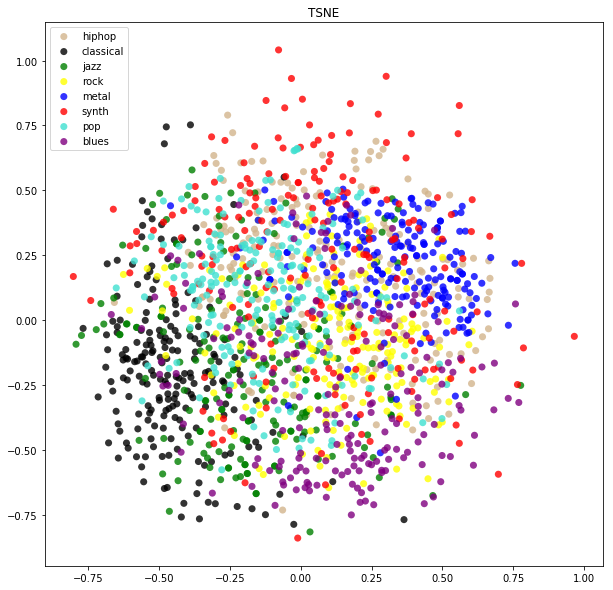

In [9]:
projection =  manifold.MDS(n_components = 2, metric = 'manhattan')
data_2d_rp = projection.fit_transform(dataframe.loc[:, 'm1':])

groups = label_dict.keys()
colors = ('tan', 'black', 'green', 'yellow', 'blue', 'red', 'Turquoise', 'purple')
data = (data_2d_rp[dataframe['tag'] == 'hiphop'], data_2d_rp[dataframe['tag'] == 'classical'], 
        data_2d_rp[dataframe['tag'] == 'jazz'],   data_2d_rp[dataframe['tag'] == 'rock'], 
        data_2d_rp[dataframe['tag'] == 'metal'],  data_2d_rp[dataframe['tag'] == 'synth'], 
        data_2d_rp[dataframe['tag'] == 'pop'],    data_2d_rp[dataframe['tag'] == 'blues'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.8, edgecolors='none', s=50, label=group, c = color)
plt.title('TSNE')
plt.legend(loc=2)
plt.show()

/home/tosha/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


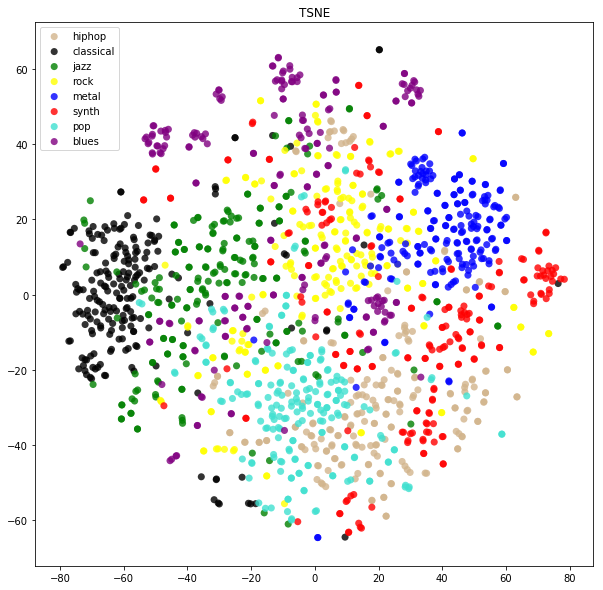

In [5]:
projection =  manifold.TSNE(n_components = 2, metric = 'manhattan')
data_2d_rp = projection.fit_transform(dataframe.loc[:, 'm1':])

groups = label_dict.keys()
colors = ('tan', 'black', 'green', 'yellow', 'blue', 'red', 'Turquoise', 'purple')
data = (data_2d_rp[dataframe['tag'] == 'hiphop'], data_2d_rp[dataframe['tag'] == 'classical'], 
        data_2d_rp[dataframe['tag'] == 'jazz'],   data_2d_rp[dataframe['tag'] == 'rock'], 
        data_2d_rp[dataframe['tag'] == 'metal'],  data_2d_rp[dataframe['tag'] == 'synth'], 
        data_2d_rp[dataframe['tag'] == 'pop'],    data_2d_rp[dataframe['tag'] == 'blues'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.8, edgecolors='none', s=50, label=group, c = color)
plt.title('TSNE')
plt.legend(loc=2)
plt.show()

/home/tosha/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(1148, 201)


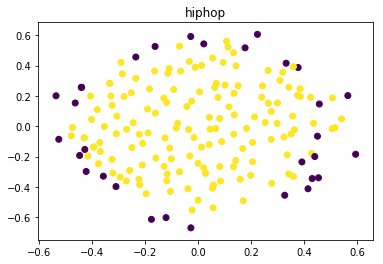

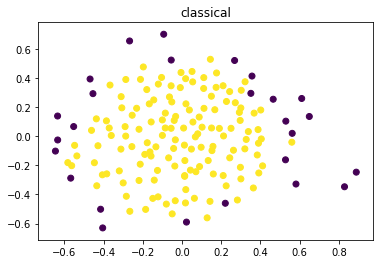

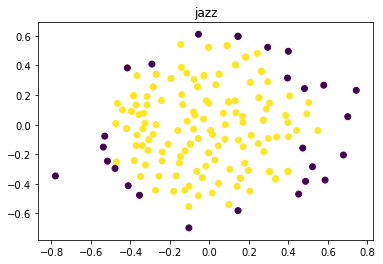

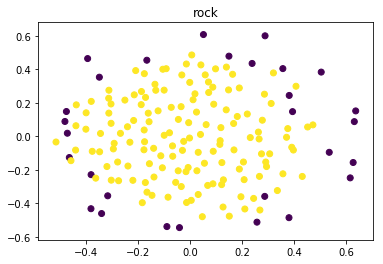

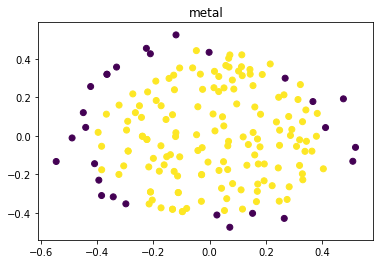

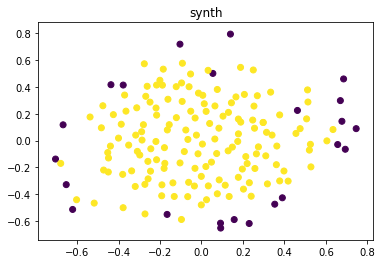

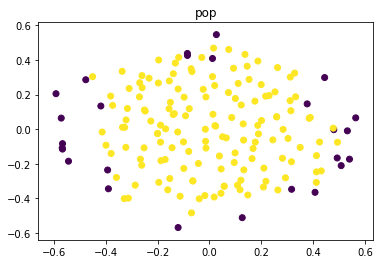

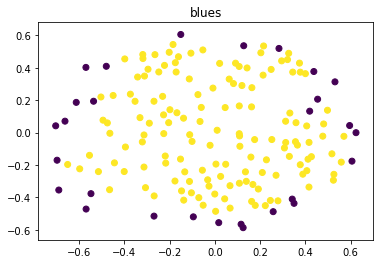

In [11]:
def search_abnom(dataframe, label, g, nu):
    svm_ = svm.OneClassSVM(gamma=g, nu=nu)
    svm_.fit(dataframe[dataframe['tag'] == label].loc[:, 'm1':])
    l = svm_.predict(dataframe[dataframe['tag'] == label].loc[:, 'm1':])
    
    fig = plt.figure()
    projection =  manifold.MDS(n_components = 2)
    data_2d_rp = projection.fit_transform(dataframe[dataframe['tag'] == label].loc[:, 'm1':])
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
    ax.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c=l)
    plt.title(label)
    
    return l

labels = ['hiphop', 'classical', 'jazz', 'rock', 'metal', 'synth', 'pop', 'blues']
for label in labels:
    svm_label = search_abnom(dataframe, label, 2, 0.15).tolist()
    dataframe[dataframe['tag'] == label] = dataframe[dataframe['tag'] == label][np.array(svm_label) == 1]
    dataframe = dataframe.dropna()
print(shape(dataframe))

/home/tosha/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


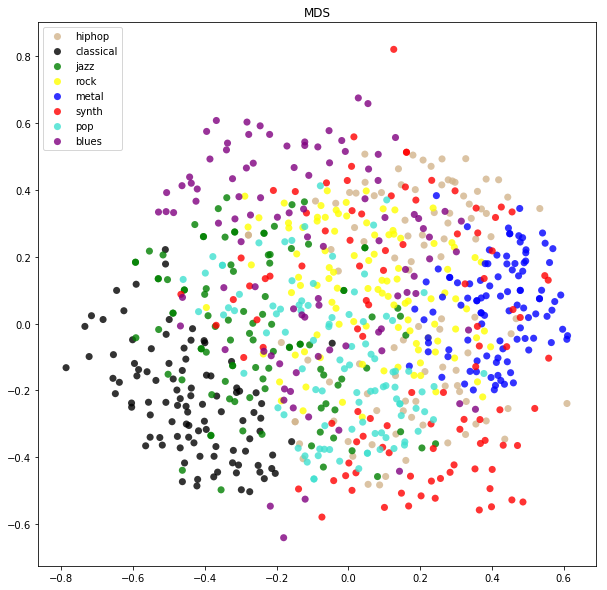

In [7]:
projection =  manifold.MDS(n_components = 2, metric = 'manhattan')
data_2d_rp = projection.fit_transform(dataframe.loc[:, 'm1':])

groups = label_dict.keys()
colors = ('tan', 'black', 'green', 'yellow', 'blue', 'red', 'Turquoise', 'purple')
data = (data_2d_rp[dataframe['tag'] == 'hiphop'], data_2d_rp[dataframe['tag'] == 'classical'], 
        data_2d_rp[dataframe['tag'] == 'jazz'],   data_2d_rp[dataframe['tag'] == 'rock'], 
        data_2d_rp[dataframe['tag'] == 'metal'],  data_2d_rp[dataframe['tag'] == 'synth'], 
        data_2d_rp[dataframe['tag'] == 'pop'],    data_2d_rp[dataframe['tag'] == 'blues'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.8, edgecolors='none', s=50, label=group, c = color)
plt.title('MDS')
plt.legend(loc=2)
plt.show()

/home/tosha/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


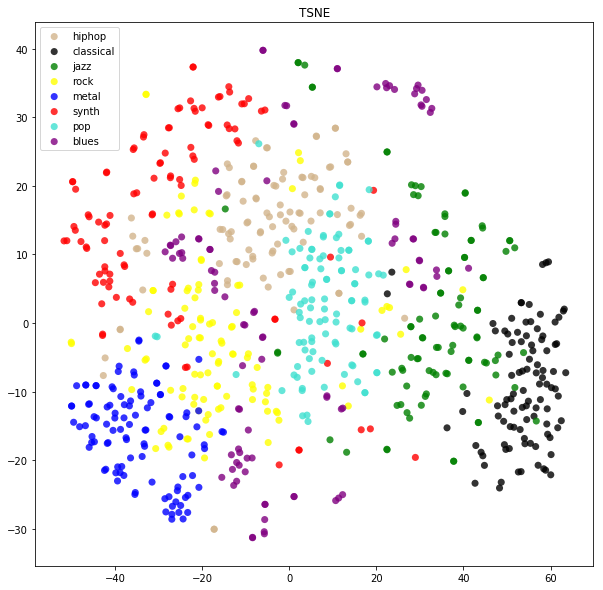

In [8]:
projection =  manifold.TSNE(n_components = 2, metric = 'manhattan')
data_2d_rp = projection.fit_transform(dataframe.loc[:, 'm1':])

groups = label_dict.keys()
colors = ('tan', 'black', 'green', 'yellow', 'blue', 'red', 'Turquoise', 'purple')
data = (data_2d_rp[dataframe['tag'] == 'hiphop'], data_2d_rp[dataframe['tag'] == 'classical'], 
        data_2d_rp[dataframe['tag'] == 'jazz'],   data_2d_rp[dataframe['tag'] == 'rock'], 
        data_2d_rp[dataframe['tag'] == 'metal'],  data_2d_rp[dataframe['tag'] == 'synth'], 
        data_2d_rp[dataframe['tag'] == 'pop'],    data_2d_rp[dataframe['tag'] == 'blues'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.8, edgecolors='none', s=50, label=group, c = color)
plt.title('TSNE')
plt.legend(loc=2)
plt.show()